---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

DCA0131 - Ciência de Dados

Discente: 

- Levy Gabriel da Silva Galvão

Título: **Natural language processing to sentimental analysis in Tweets with Scikit Learning**

---

## Library import

In [13]:
# Libraries

# Data manipulation
import numpy as np
import pandas as pd
import sklearn as sl
import zipfile as zf
import matplotlib.pyplot as plt

# Scipy
import scipy.stats as stats

# Model persistence
from joblib import dump, load

# Machine Learning
from sklearn.utils import shuffle   
from sklearn.utils.fixes import loguniform
from sklearn.pipeline import Pipeline   
from sklearn.feature_extraction.text import CountVectorizer, \
                                            TfidfTransformer
from sklearn.metrics import classification_report, \
                            confusion_matrix, \
                            plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, \
                                    RandomizedSearchCV, \
                                    train_test_split 
from sklearn.naive_bayes import GaussianNB, \
                                MultinomialNB, \
                                ComplementNB, \
                                BernoulliNB, \
                                CategoricalNB
from sklearn.neural_network import MLPClassifier

## Load dataset

The dataset of choose was taken from the **Kaggle** and it is named Sentimental Analysis for Tweets (https://www.kaggle.com/gargmanas/sentimental-analysis-for-tweets) containing several tweets labeled according to if the person that tweeted has depression. 

The objective of this notebook is to train a machine learning model capable of identifying depression flags in peoples texts, serving as a premature and quick diagnostics for a mental health situation.

Since there is a use of a binary label to indetify depression, it is important to clarify that a label '1' indicates a person with depression and '0' the contrary.

In [ ]:
!gdown --id 1vKN2THR4CpqLDD6M_C1sCUqbdwFF6dZg &> /dev/null
zip_ref = zf.ZipFile('dataset.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
twitter = '/content/files/sentiment_tweets3.csv' # original source: https://www.kaggle.com/gargmanas/sentimental-analysis-for-tweets
df = pd.read_csv(twitter, 
                 usecols=['message to examine', 'label (depression result)'], 
                 encoding='ISO-8859-1')
df.columns = ['text', 'target']
df = shuffle(df)
df.head()

,text,target
873,hello everybody !,0
8714,It eats me up knowing I literally Lost a piece...,1
3204,@amber_benson awesome..what did you tell her? ...,0
2340,@therealTiffany check it out epi. haha it make...,0
6803,At the bubble house again,0


Based in the quality of the dataset, there is no further pre processing regarding data cleaning or data imputation, since the info below does not show any null data and less likely the necessity to impute data, since the data is mainly categorical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 873 to 2093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10314 non-null  object
 1   target  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.7+ KB


## Holdout

The data separation strategy used was a simple **holdout**, separating the trian and test set with a classical proportion of 80%/20%.

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True) # shuffle and holdout

y_train = np.array(train['target'])
y_test = np.array(test['target'])

## Feature extraction

Before applying any Machine Learning (ML) algorithm, it is important to notice that textual data from the tweets can not be handled directly in its character format.

Regarding this fact it was used the ```CountVectorizer()``` and the ```TfidfTransformer()``` classes from scikit learn to perform a feature extraction. First ```CountVectorizer()``` would transform the collection of text into a matrix of token counts that allows to be inputed in a ML model. For further improvement ```TfidfTransformer()``` was used to remove tokens that occurs frequently, but is less informative.

The end product is are train and test matrixes of features that resembles like any other typical numerical data and can be fed normally to any supervised ML model.



In [ ]:
steps = [('vect', CountVectorizer()), ('tfidf', TfidfTransformer())] # or only TfidfVectorizer
pipeline = Pipeline(steps)

X_train = pipeline.fit_transform(train['text'])
X_test = pipeline.transform(test['text'])

In [ ]:
print('X_train shape:' + str(X_train.shape))
print('X_test shape:' + str(X_test.shape))

X_train shape:(8251, 19283)
X_test shape:(2063, 19283)


## Neural Network

The first ML model used was a Neural Network, allowing to demonstrate the use of a robust and adaptive algorithm and that used the help of a hyperparameter tunning based in a randomized search.

The list of parameters distribution used have multiply solvers and activation functions avaliable in the ```MLPClassifier()``` (multi-layer perceptron classifier) class. Also a log-unfirom function was fed regarding the learning rate e alpha hyperparameters for the neural network.

In [ ]:
def run(clf, X_train, X_test, y_train, y_test):
  param_dist = {'solver': ['lbfgs','sgd','adam'],
                'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'learning_rate_init' : loguniform(1e-4, 1e0),
                'alpha': loguniform(1e-4, 1e0)}
  model = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10)
  model = model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print('best params')
  print(model.best_params_)
  print('best score')
  print(model.best_score_)
  print('best estimator')
  print(model.best_estimator_)
  print(classification_report(y_test, predictions))
  print(confusion_matrix(y_test, predictions))
  plot_confusion_matrix(model, X_test, y_test, cmap='gray', values_format='d')  
  plt.show()  
  return model

The classifier was instantiated with a arbitrary number of hidden layer and hidden layer sizes, allowing shuffle at each iteration, a tolerance in the order of $10^{-3}$ and 100 maximum iterations.

Iteration 1, loss = 0.53134707
Iteration 2, loss = 0.49933494
Iteration 3, loss = 0.07413741
Iteration 4, loss = 0.01621251
Iteration 5, loss = 0.00931130
Iteration 6, loss = 0.00803816
Iteration 7, loss = 0.00790922
Iteration 8, loss = 0.00772659
Iteration 9, loss = 0.00770736
Iteration 10, loss = 0.00755340
Iteration 11, loss = 0.00769692
Iteration 12, loss = 0.00757116
Iteration 13, loss = 0.00754865
Iteration 14, loss = 0.00750606
Iteration 15, loss = 0.00745314
Iteration 16, loss = 0.00740697
Iteration 17, loss = 0.00732131
Iteration 18, loss = 0.00729755
Iteration 19, loss = 0.00733725
Iteration 20, loss = 0.00727314
Iteration 21, loss = 0.00709256
Iteration 22, loss = 0.00718188
Iteration 23, loss = 0.00706109
Iteration 24, loss = 0.00691169
Iteration 25, loss = 0.00690534
Iteration 26, loss = 0.00708114
Iteration 27, loss = 0.00706182
Iteration 28, loss = 0.00707179
Iteration 29, loss = 0.00711733
Iteration 30, loss = 0.00716799
Iteration 31, loss = 0.00706267
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Iteration 1, loss = 0.58927421
Iteration 2, loss = 0.52932306
Iteration 3, loss = 0.52819617
Iteration 4, loss = 0.52713868
Iteration 5, loss = 0.52627763
Iteration 6, loss = 0.52546953
Iteration 7, loss = 0.52442796
Iteration 8, loss = 0.52333965
Iteration 9, loss = 0.52242262
Iteration 10, loss = 0.52116464
Iteration 11, loss = 0.51990232
Iteration 12, loss = 0.51846466
Iteration 13, loss = 0.51794435
Iteration 14, loss = 0.51519152
Iteration 15, loss = 0.51344141
Iteration 16, loss = 0.51149829
Iteration 17, loss = 0.50929186
Iteration 18, loss = 0.50651718
Iteration 19, loss = 0.50508852
Iteration 20, loss = 0.50015267
Iteration 21, loss = 0.49616990
Iteration 22, loss = 0.49164218
Iteration 23, loss = 0.48818814
Iteration 24, loss = 0.48101983
Iteration 25, loss = 0.47330581
Iteration 26, loss = 0.46517935
Iteration 27, loss = 0.45541423
Iteration 28, loss = 0.44387887
Iteration 29, loss = 0.43084093
Iteration 30, loss = 0.41498330
Iteration 31, loss = 0.39661701
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Iteration 1, loss = 0.59010009
Iteration 2, loss = 0.52902703
Iteration 3, loss = 0.52831338
Iteration 4, loss = 0.52712125
Iteration 5, loss = 0.52619056
Iteration 6, loss = 0.52543731
Iteration 7, loss = 0.52444932
Iteration 8, loss = 0.52449860
Iteration 9, loss = 0.52251297
Iteration 10, loss = 0.52192459
Iteration 11, loss = 0.51960906
Iteration 12, loss = 0.51836393
Iteration 13, loss = 0.51679658
Iteration 14, loss = 0.51511377
Iteration 15, loss = 0.51316755
Iteration 16, loss = 0.51118942
Iteration 17, loss = 0.50887996
Iteration 18, loss = 0.50614847
Iteration 19, loss = 0.50309756
Iteration 20, loss = 0.49949986
Iteration 21, loss = 0.49558164
Iteration 22, loss = 0.49089357
Iteration 23, loss = 0.48564677
Iteration 24, loss = 0.47954347
Iteration 25, loss = 0.47213399
Iteration 26, loss = 0.46381113
Iteration 27, loss = 0.45372212
Iteration 28, loss = 0.44180218
Iteration 29, loss = 0.42795657
Iteration 30, loss = 0.41134765
Iteration 31, loss = 0.39233389
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Iteration 1, loss = 0.58981070
Iteration 2, loss = 0.52889214
Iteration 3, loss = 0.52839734
Iteration 4, loss = 0.52724988
Iteration 5, loss = 0.52630160
Iteration 6, loss = 0.52552911
Iteration 7, loss = 0.52439413
Iteration 8, loss = 0.52413138
Iteration 9, loss = 0.52226075
Iteration 10, loss = 0.52195650
Iteration 11, loss = 0.51959551
Iteration 12, loss = 0.51827597
Iteration 13, loss = 0.51677745
Iteration 14, loss = 0.51492119
Iteration 15, loss = 0.51298363
Iteration 16, loss = 0.51096226
Iteration 17, loss = 0.50865722
Iteration 18, loss = 0.50578510
Iteration 19, loss = 0.50281141
Iteration 20, loss = 0.49897157
Iteration 21, loss = 0.49489383
Iteration 22, loss = 0.49012023
Iteration 23, loss = 0.48463247
Iteration 24, loss = 0.47836879
Iteration 25, loss = 0.47076066
Iteration 26, loss = 0.46205275
Iteration 27, loss = 0.45167699
Iteration 28, loss = 0.43933385
Iteration 29, loss = 0.42510718
Iteration 30, loss = 0.40802202
Iteration 31, loss = 0.38807563
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Iteration 1, loss = 0.59003075
Iteration 2, loss = 0.52901985
Iteration 3, loss = 0.52851776
Iteration 4, loss = 0.52734536
Iteration 5, loss = 0.52638661
Iteration 6, loss = 0.52551631
Iteration 7, loss = 0.52440849
Iteration 8, loss = 0.52405172
Iteration 9, loss = 0.52224314
Iteration 10, loss = 0.52203670
Iteration 11, loss = 0.51957793
Iteration 12, loss = 0.51819513
Iteration 13, loss = 0.51676052
Iteration 14, loss = 0.51482674
Iteration 15, loss = 0.51296275
Iteration 16, loss = 0.51071141
Iteration 17, loss = 0.50837601
Iteration 18, loss = 0.50556277
Iteration 19, loss = 0.50247670
Iteration 20, loss = 0.49868124
Iteration 21, loss = 0.49626845
Iteration 22, loss = 0.48976927
Iteration 23, loss = 0.48438230
Iteration 24, loss = 0.47784622
Iteration 25, loss = 0.47038517
Iteration 26, loss = 0.46132566
Iteration 27, loss = 0.45074897
Iteration 28, loss = 0.43827261
Iteration 29, loss = 0.42379398
Iteration 30, loss = 0.40632022
Iteration 31, loss = 0.38658175
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Iteration 1, loss = 0.55016409
Iteration 2, loss = 0.52469430
Iteration 3, loss = 0.51926070
Iteration 4, loss = 0.51131144
Iteration 5, loss = 0.49542257
Iteration 6, loss = 0.46065540
Iteration 7, loss = 0.38130059
Iteration 8, loss = 0.23872054
Iteration 9, loss = 0.11656871
Iteration 10, loss = 0.06455513
Iteration 11, loss = 0.04295704
Iteration 12, loss = 0.03166332
Iteration 13, loss = 0.02471935
Iteration 14, loss = 0.02026341
Iteration 15, loss = 0.01673811
Iteration 16, loss = 0.01408089
Iteration 17, loss = 0.01210914
Iteration 18, loss = 0.01058046
Iteration 19, loss = 0.00910449
Iteration 20, loss = 0.00813157
Iteration 21, loss = 0.00728533
Iteration 22, loss = 0.00664538
Iteration 23, loss = 0.00605343
Iteration 24, loss = 0.00562745
Iteration 25, loss = 0.00523479
Iteration 26, loss = 0.00496628
Iteration 27, loss = 0.00477392
Iteration 28, loss = 0.00445467
Iteration 29, loss = 0.00432821
Iteration 30, loss = 0.00416368
Iteration 31, loss = 0.00404935
Iteration 32, los

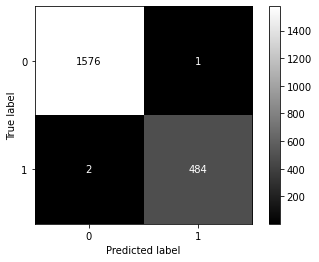

In [ ]:
clf = MLPClassifier(random_state=0, max_iter=100, verbose=True, shuffle=True, tol=1e-3, hidden_layer_sizes=(100,100,100))
model = run(clf, X_train, X_test, y_train, y_test)

In the set of estimators trained, the randomized search found the best having a score of $99.46\%$ turning to be a excelent result.

Despite the good results, there are still doubts if the neural network model is the adequate for this dataset, since the the random search of hyperparameters and therefore the training of the model took a substancial time.

Albeit the doubts the best estimator was yet saved for latter analysis.

In [15]:
dump(model, 'mlpclassifier.joblib') 
#load('mlpclassifier.joblib')

['mlpclassifier.joblib']

## Naive Bayes 

The second choice of ML algorithms was a set of Naive Bayes methods. First of all was analysed the use o the "raw" models as it is with default parameters provided by the Scikit Learn library. Also a hyperparameter tunning with grid search was performed to see with there is any improvement in the model score.

### Raw models

In [ ]:
def run(model, X_train, X_test, y_train, y_test):
  model = model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(classification_report(y_test, predictions))
  plot_confusion_matrix(model, X_test, y_test, cmap='gray', values_format='d')  
  plt.show()  
  return model

The first model was the ```MultinomialNB``` that implements the naive Bayes algorithm for multinomially distributed data and adequate to text data that are typically represented as word vector counts.

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1587
           1       1.00      0.50      0.66       476

    accuracy                           0.88      2063
   macro avg       0.93      0.75      0.80      2063
weighted avg       0.90      0.88      0.87      2063



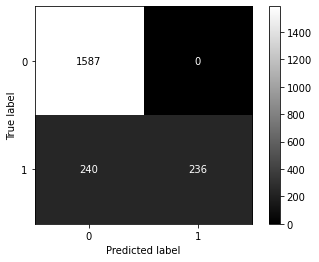

In [ ]:
model = run(MultinomialNB(), X_train, X_test, y_train, y_test)

Althought the ```ComplementNB()``` model that implements the complement naive Bayes, typically suited for imbalanced data sets and a improvement in the latter algorithms seems to show better results.

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1587
           1       0.92      0.77      0.84       476

    accuracy                           0.93      2063
   macro avg       0.93      0.87      0.90      2063
weighted avg       0.93      0.93      0.93      2063



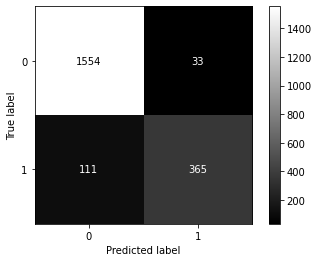

In [ ]:
model = run(ComplementNB(), X_train, X_test, y_train, y_test)

But in the end the ```BernoulliNB()``` model for data distributed according to multivariate Bernoulli distributions showed even better results with the highest accuracy of $95\%$.

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1587
           1       1.00      0.77      0.87       476

    accuracy                           0.95      2063
   macro avg       0.97      0.89      0.92      2063
weighted avg       0.95      0.95      0.95      2063



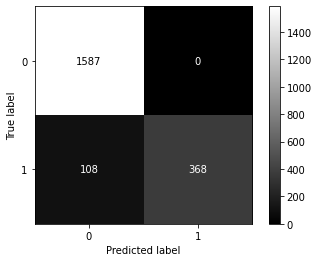

In [ ]:
model = run(BernoulliNB(), X_train, X_test, y_train, y_test)

### Hyperparameter tunning

Not satisfied with previous results the hyperparameter tunning was applied to each of the previous naive Bayes models changing, mainly, its alpha factor and, aditionally, the parameters for vectorization the TF-IDF in feature extraction.

In [22]:
def run(clf, X_train, X_test, y_train, y_test):
  steps = [('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', clf)] 
  pipeline = Pipeline(steps)
  parameters = {
                'vect__ngram_range': [(1,1), (1,2), (2,2)],
                'vect__max_df': (0.5, 0.75, 1.0),
                'vect__max_features': (None, 100, 1000, 10000),
                'tfidf__use_idf': (True, False),
                'clf__alpha': (1e-3, 1e-2, 1e-1, 0.5, 1)
  }
  model = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=True)
  model = model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(model.best_params_)
  print(model.best_score_)
  print(classification_report(y_test, predictions))
  print(confusion_matrix(y_test, predictions))
  plot_confusion_matrix(model, X_test, y_test, cmap='gray', values_format='d')  
  plt.show()  
  return model

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  8.3min finished


{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__max_df': 0.5, 'vect__max_features': 100, 'vect__ngram_range': (1, 1)}
0.9921219462951747
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1587
           1       0.99      0.97      0.98       476

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[[1584    3]
 [  12  464]]


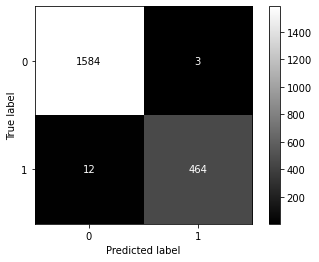

In [ ]:
model = run(MultinomialNB(), train['text'], test['text'], train['target'], test['target'])

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  8.3min finished


{'clf__alpha': 0.1, 'tfidf__use_idf': False, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__ngram_range': (1, 2)}
0.9710340473175119
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1587
           1       0.91      0.97      0.94       476

    accuracy                           0.97      2063
   macro avg       0.95      0.97      0.96      2063
weighted avg       0.97      0.97      0.97      2063

[[1541   46]
 [  15  461]]


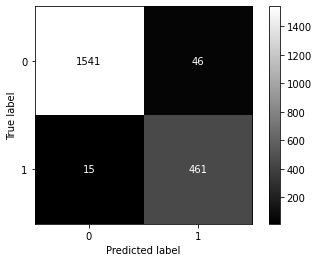

In [ ]:
model = run(ComplementNB(), train['text'], test['text'], train['target'], test['target'])

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  9.1min finished


{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__max_df': 0.5, 'vect__max_features': 100, 'vect__ngram_range': (1, 1)}
0.9956368041407412
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1577
           1       1.00      0.99      1.00       486

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[[1576    1]
 [   3  483]]


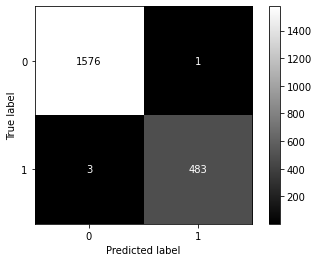

In [30]:
model = run(BernoulliNB(), train['text'], test['text'], train['target'], test['target']) 

After seeing the results, the conclusion is that the grid search improved the accuracy of all models and with the ```BernoulliNB()``` keeping the position of better model with a accuracy as close as $99.56\%$, with slightly better results than the neural network, trained with less computational resources, less parameters and using a reduced number of features.

The latter model was saved to further analysis.

In [31]:
dump(model, 'bernoullinb.joblib') 
#load('bernoullinb.joblib')

['bernoullinb.joblib']